#  Python: Plotting
## Chapter 10 & 11 from the Alex DeCaria textbook

Reading in and manipulating data is great, however, visualizing this data in some shape or form is often the end result for most programs! In this lecture we will learn how to plot up that data and edit different plotting elements to make our plots more visually appealing.
- We learn how to make a simple 1-D line plot
- Adjust different elements in our line plot 
- Plot data from the dateframe that we were working with last week.
- Visualize data in other ways such as histograms, pie charts, and scatter plots.

**Before starting:** Make sure that you open up a Jupyter notebook session using OnDemand and copy this file for your `atmos5340/module_9 subdirectory`!


<br>

<br>

#  Basic plotting

Before we can start plotting data, we must import the matplotlib plotting library, which contains classes and functions for creatig MATLAB-style plots and graphs. We will primarily be working with the `pyplot` submodule for today's lecture. In addition, lets go ahead and import NumPy and Pandas, since we will be utilizing functions from those modules as well.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Lets create a dummy data set to initially work with before we start working with 'real' data. Using NumPy, create the following 1-D array:

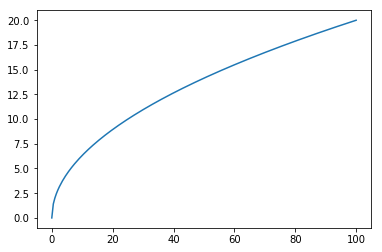

In [2]:
x = np.arange(0,100.5,0.5)
y = 2.0*np.sqrt(x) 
plt.plot(x,y)
plt.show()

What happened? 

Once you call the function pyplot.show() is called, which can be shorthanded as `plt.show()`, no more changes can be made to our plot or its axes.

<br>

A matplotlib plot generally consists of a `figure` object and an `axes` object. In the example above, these were automatically generated for us using the `plt.plot()` function. However, if we want to have more control of our plot, such as adding muliple axes, we will want to have more control over our plotting routines. Here, we will want to store our plot as a figure object by setting setting plt.figure() to a variable:


In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Once a figure has been created, axes objected can be created and placed on our figure using `add_axes()` method for the figure object. Anyways more on this later, as this is used for slightly more advanced plots, which we are not quite ready for yet!

<br>

To change the color of our line plot, we can simply note a color when executing the plt.plot() function. For example, what if we wanted a *red* line:


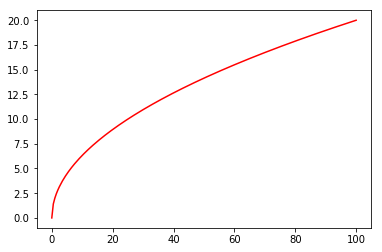

In [4]:
plt.plot(x,y,'red')
plt.show()

Did you get a red line?

<br>

We can also plot multiple lines/markers on a single plot just by calling the plt.plot() function multiple times before showing the figure.


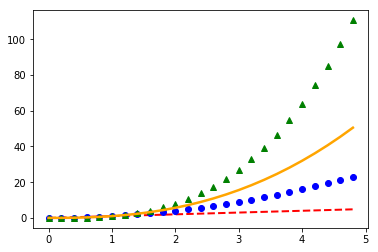

In [5]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

plt.plot(t, t, color="red", linestyle = "--",linewidth=2) 
plt.plot(t, t**2, color="blue", marker = "o",linewidth=0)
plt.plot(t, t**3, color="green", marker = "^",linewidth=0)
plt.plot(t, t**(5/2), color="orange", linestyle = "-",linewidth=5/2)
plt.show()

<br>

> I really nice quick guide on Python line and marker options can be found [here](https://towardsdatascience.com/all-your-matplotlib-questions-answered-420dd95cb4ff)

Also, the figure below may be useful as it identifies plotting elements and the terminology used to name them. This could be helpful, especially when googling questions:<br>

<img src='../images/plot_elements.png' width=700px align='center' style='padding-left:100px'>



<br>

To add labels to our figure we can use the `plt.xlabel()`, `plt.ylabel()`, and  `plt.title()` functions:


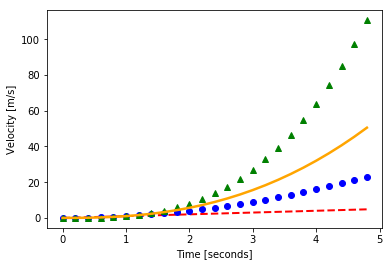

In [6]:
t = np.arange(0., 5., 0.2)

plt.plot(t, t, color="red", linestyle = "--",linewidth=2) 
plt.plot(t, t**2, color="blue", marker = "o",linewidth=0)
plt.plot(t, t**3, color="green", marker = "^",linewidth=0)
plt.plot(t, t**(5/2), color="orange", linestyle = "-",linewidth=5/2)
plt.xlabel('Time [seconds]')
plt.ylabel('Velocity [m/s]')
plt.show()


<br>

If labels are added to each plot element, we can use this to create a legend.


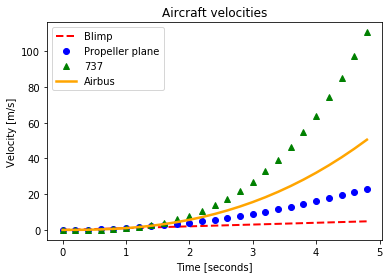

In [7]:
t = np.arange(0., 5., 0.2)

plt.plot(t, t, color="red", linestyle = "--",linewidth=2,label="Blimp") 
plt.plot(t, t**2, color="blue", marker = "o",linewidth=0,label="Propeller plane")
plt.plot(t, t**3, color="green", marker = "^",linewidth=0,label="737")
plt.plot(t, t**(5/2), color="orange", linestyle = "-",linewidth=5/2,label="Airbus")
plt.xlabel('Time [seconds]')
plt.ylabel('Velocity [m/s]')
plt.title('Aircraft velocities')
plt.legend(loc="upper left")
plt.show()

<br>

Lets say we wanted to zoom in on the lower velocity values. How would we do this? Fortunately, maplotlib has a function for explicitly setting the y `ylim` and x `xlim` axis limits:

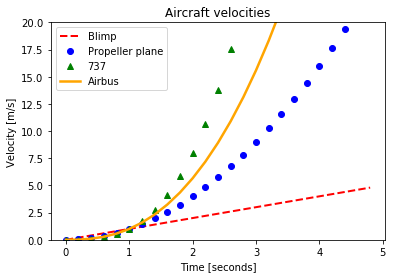

In [10]:
t = np.arange(0., 5., 0.2)

plt.plot(t, t, color="red", linestyle = "--",linewidth=2,label="Blimp") 
plt.plot(t, t**2, color="blue", marker = "o",linewidth=0,label="Propeller plane")
plt.plot(t, t**3, color="green", marker = "^",linewidth=0,label="737")
plt.plot(t, t**(5/2), color="orange", linestyle = "-",linewidth=5/2,label="Airbus")
plt.xlabel('Time [seconds]')
plt.ylabel('Velocity [m/s]')
plt.title('Aircraft velocities')
plt.legend(loc="upper left")
plt.ylim(0,20)
plt.show()

<br>

Python's matplotlib library as has the ability to create multi-panel plots when the programmer utlizies the the `plt.subplot()` function. The first two arguments, `nrows`, `ncols`, defines the number of panels. These are usually inputed as integers. In the code snipit below, we tell matplotlib that we want 2 rows and 1 column, so a 'vertical' 2 panel plot. This function returns a figure and axes object. If you check the length of each of these objects using the `len()` function, unsuprisingly, they have a length = 2, since we wanted *two* panels as given by our arguements for the `plt.subplot()` function.


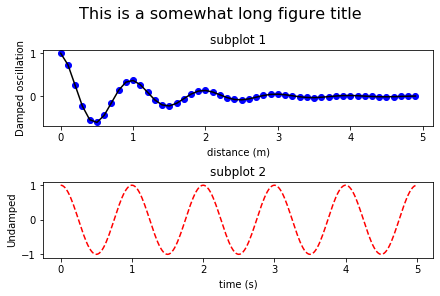

In [9]:
#Define a function
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

#Create some data points...
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

#Lets create a plot!
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(t1, f(t1),color="blue", marker = "o",linewidth=0)
axs[0].plot(t1, f(t1),color="black", linestyle = "-")
axs[0].set_title('subplot 1')
axs[0].set_xlabel('distance (m)')
axs[0].set_ylabel('Damped oscillation')
fig.suptitle('This is a somewhat long figure title', fontsize=16)

axs[1].plot(t2, np.cos(2*np.pi*t2),color='red',linestyle = "--")
axs[1].set_xlabel('time (s)')
axs[1].set_title('subplot 2')
axs[1].set_ylabel('Undamped')
plt.show()
    

#  Lets plot up some real data!

Now that we can make some basic 1-D plots, lets play around with some real data now! From our last lecture, you may recall that we read in some meteorological data for WBB into a dataframe and played around with some of this data using Pandas. Now that we know how to plot data based on the example provided above, lets go back and plot up some of our meteorological data from last class!


In [10]:
#Read in our csv file
dat = pd.read_csv('../module_8/module8_WBB.csv',sep=',',skiprows=6,index_col=1,parse_dates=True)
    
#Decompose wind into u- and v-components incase we do any sort of time averaging...
u = -1*dat['wind_speed_set_1']*np.sin(dat['wind_direction_set_1']*(np.pi/180))
v = -1*dat['wind_speed_set_1']*np.cos(dat['wind_direction_set_1']*(np.pi/180))
    
dat['u_wind'] = u
dat['v_wind'] = v 

<br>

# Do it yourself!

1) Make a plot of temperature from our pandas dataframe, which we just read in

2) Can you make a panel plot with temperature and wind?

3) Does the data tell you anything? Is there anything interesting about this data?

<br>

#  Other types of plots

In addition to doing timeseries, matplotlib library also has the ability to make other types of plots such as histograms, pie charts, scatter plots and so on. Lets look at a few quick examples...
<br><br>
**Histograms:** Lets use our wind data and check out the distribution of winds during our downslope wind storm:


Text(0.5, 1.0, 'Histogram of wind gusts')

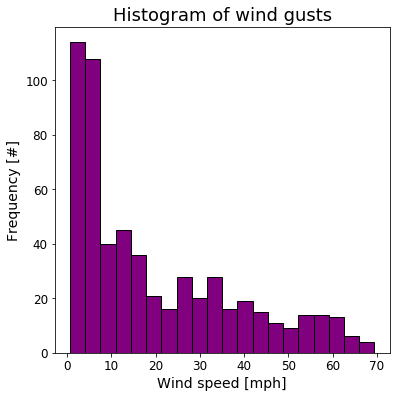

In [11]:
plt.figure(figsize=(6,6))
plt.hist(dat['wind_gust_set_1'],bins=20,edgecolor='black', linewidth=1,color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Wind speed [mph]',fontsize=14)
plt.ylabel('Frequency [#]',fontsize=14)
plt.title('Histogram of wind gusts',fontsize=18)


<br>
    
**Scatterplots:** What is the relationship between wind speeds and gusts? Do we see higher wind gusts when the wind is stronger? 


(0, 69.43)

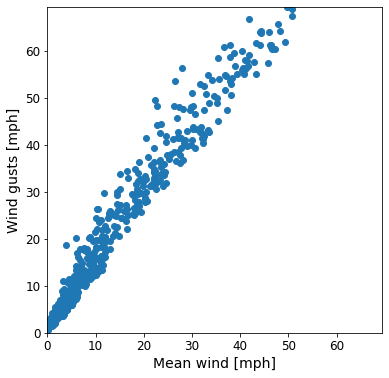

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(dat['wind_speed_set_1'],dat['wind_gust_set_1'], marker='o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Mean wind [mph]',fontsize=14)
plt.ylabel('Wind gusts [mph]',fontsize=14)
plt.xlim(0,np.max([dat['wind_gust_set_1'],dat['wind_speed_set_1']]))
plt.ylim(0,np.max([dat['wind_gust_set_1'],dat['wind_speed_set_1']]))

<br>

**Categorial plots:** You may also want to create a plot that uses categorical variables in Matplotlib...


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 10 Text yticklabel objects>)

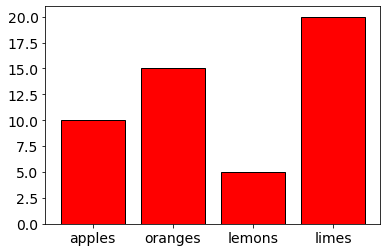

In [13]:
#Create a dictionary of items we want to plot
data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())
    
plt.bar(names, values,color="red",edgecolor='black',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


<br>

**Box and whisker plots:**


{'whiskers': [<matplotlib.lines.Line2D at 0x7f81c2a66358>,
 'caps': [<matplotlib.lines.Line2D at 0x7f81c2a66a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f81c2a54ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f81c2a66e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f81c29f0470>],
 'means': []}

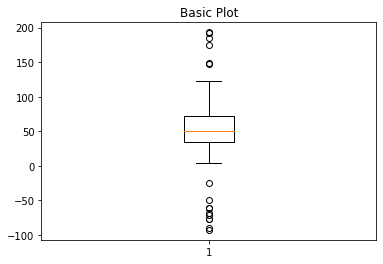

In [14]:
#Fixing random state for reproducibility
np.random.seed(19680801)

#fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

<br>

**Contour plots:** Finally, matplotlib can also plot maps and contour maps. More on this next week....!


<br><br>

# Want more practice!?

Check out the following webpages:<br>
https://matplotlib.org/2.0.2/users/pyplot_tutorial.html<br>
https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python<br>
https://pythonprogramming.net/matplotlib-python-3-basics-tutorial/<br>
https://www.w3schools.com/PYTHON/matplotlib_intro.asp<br>
https://www.johnny-lin.com/pyintro/ed01/free_pdfs/ch09.pdf<br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html<br>

